In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
r=requests.get('https://www.olx.pl/oferty/q-nintendo-switch/')
c=r.content
soup=bs(c, 'lxml')

In [3]:
base_url = 'https://www.olx.pl/oferty/q-nintendo-switch/?page='
last_page = int(soup.select("a[data-cy='page-link-last']")[-1].get_text().replace('\n',''))

In [4]:
l = []
for page in range(1,last_page+1,1):
    print('scraped: '+base_url+str(page))
    r=requests.get(base_url+str(page), headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
    c=r.content
    soup=bs(c, 'html.parser')
    for item, price in zip(soup.select("tr[class='wrap'] td[class='title-cell'] a"), soup.select("tr[class='wrap'] p[class='price']")):
        d = {}
        d["title"] = item.get_text().replace('\n','')
        d["link"] = item.get('href')
        try:
            d['price'] = int(price.get_text().replace('zł', '').replace('\n', '').replace(' ', ''))
        except:
            d['price'] = 0
        l.append(d)

scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=1
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=2
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=3
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=4
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=5
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=6
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=7
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=8
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=9
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=10
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=11
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=12
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=13
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=14
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=15
scraped: https://www.olx.pl/oferty/q-nintendo-switch/?page=16
scraped: https://

In [5]:
l

[{'title': 'Nintendo switch',
  'link': 'https://www.olx.pl/oferta/nintendo-switch-CID99-IDJxAl4.html#1990a994a4;promoted',
  'price': 1400},
 {'title': 'Nintendo Switch Lite 20 gier',
  'link': 'https://www.olx.pl/oferta/nintendo-switch-lite-20-gier-CID99-IDIcDg7.html#1990a994a4;promoted',
  'price': 899},
 {'title': 'Ps4 Playstation4  1216 1 TB zestaw pad , gra Zam Nintendo switch',
  'link': 'https://www.olx.pl/oferta/ps4-playstation4-1216-1-tb-zestaw-pad-gra-zam-nintendo-switch-CID99-IDJumj0.html#1990a994a4;promoted',
  'price': 770},
 {'title': 'Nintendo Switch V2 Gwarancja',
  'link': 'https://www.olx.pl/oferta/nintendo-switch-v2-gwarancja-CID99-IDIShlm.html#1990a994a4;promoted',
  'price': 1169},
 {'title': 'Gry Nintendo Switch Final Fantasy Minecraft Super Mario Bros Pokemon',
  'link': 'https://www.olx.pl/oferta/gry-nintendo-switch-final-fantasy-minecraft-super-mario-bros-pokemon-CID99-IDIi8jC.html#1990a994a4;promoted',
  'price': 0},
 {'title': 'Etui wzmocnione do konsoli Nin

In [6]:
df=pd.DataFrame(l)

In [7]:
df

,title,link,price
0,Nintendo switch,https://www.olx.pl/oferta/nintendo-switch-CID9...,1400
1,Nintendo Switch Lite 20 gier,https://www.olx.pl/oferta/nintendo-switch-lite...,899
2,"Ps4 Playstation4 1216 1 TB zestaw pad , gra Z...",https://www.olx.pl/oferta/ps4-playstation4-121...,770
3,Nintendo Switch V2 Gwarancja,https://www.olx.pl/oferta/nintendo-switch-v2-g...,1169
4,Gry Nintendo Switch Final Fantasy Minecraft Su...,https://www.olx.pl/oferta/gry-nintendo-switch-...,0
...,...,...,...
1094,Joy con nintendo switch,https://www.olx.pl/oferta/joy-con-nintendo-swi...,199
1095,Gry na Nintendo Switch,https://www.olx.pl/oferta/gry-na-nintendo-swit...,89
1096,Gra Nintendo Switch DOOM,https://www.olx.pl/oferta/gra-nintendo-switch-...,90
1097,Gra Nintendo Switch Mario Tennis Aces,https://www.olx.pl/oferta/gra-nintendo-switch-...,100


In [8]:
#df.to_csv('output.csv')

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

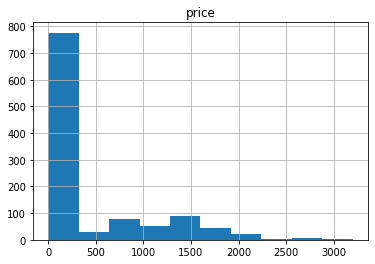

In [9]:
df.hist('price')

In [10]:
df2 = df[df['price']>=500]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

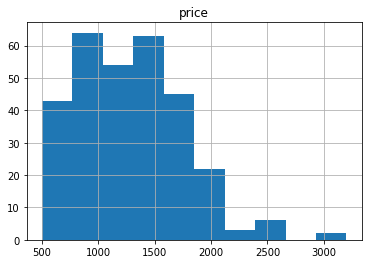

In [11]:
df2.hist('price')